# Анализ оттока банковских клиентов
---

## Материалы:
- [Презентация](https://drive.google.com/file/d/1hispLcM_XMjvpjXuI0PeKVs4Fwnzn0YM/view?usp=sharing)
- [Дашборд](https://public.tableau.com/profile/alexandr5040#!/vizhome/final_dash_16162721577670/Dashboard1)


## Описание проекта

Мы работаем в региональном банке «Метанпром», который располагается в Ярославле и областных городах: Ростов Великий и Рыбинск. В рамках данного проекта мы проведем анализ оттока клиентов этого банка.

**Заказчик** - менеджер проекта, его *цель* - разработать меры по удержанию клиентов. С этим мы ему должны помочь.

**Задача:** проанализировать клиентов регионального банка и выделить портрет клиентов, которые склонны уходить из банка.

**Декомпозиция задачи:**
- [описание данных](#Описание-данных);
- [предобработка данных](#Предобработка-данных):
    - [проверка корректности типов](#Проверка-корректности-типов);
    - [исследование пропущенных значений](#Исследование-пропущенных-значений);
    - [проверка наличия дубликатов](#Проверка-наличия-дубликатов);
    - [приведение названий колонок к единому виду](#приведение-названий-колонок-к-единому-виду);
- [исследовательский анализ данных (EDA)](#Исследовательский-анализ-данных-(EDA)):
    - [определение мер центральной тенденции для признаков](#Определение-мер-центральной-тенденции-для-признаков);
    - [изучение распределений признаков](#Изучение-распределений-признаков);
    - [корреляционный анализ](#Корреляционный-анализ);
- [*выделение портретов клиентов, которые склонны уходить из банка*](#Выделение-портретов-клиентов,-которые-склонны-уходить-из-банка):
    - [определение мер центральной тенденции для признаков в разрезе оттока](#Определение-мер-центральной-тенденции-для-признаков-в-разрезе-оттока);
    - [изучение распределений признаков в разрезе оттока](#Изучение-распределений-признаков-в-разрезе-оттока);
- [проверка статистических гипотез](#Проверка-статистических-гипотез);
- [выводы и рекоммендации](#Выводы-и-рекоммендации).

### Описание данных
[Вернуться в начало](#Описание-проекта)

Датасет содержит данные о клиентах банка «Метанпром». 

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

### Предобработка данных
[Вернуться в начало](#Описание-проекта)

In [1]:
import pandas as pd
import numpy as np

from IPython.display import HTML

import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import scipy.stats as st

Загрузим файл с данными и выведем таблицу:

In [2]:
df = pd.read_csv('/datasets/bank_dataset.csv')
display(df.head())

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


#### Проверка корректности типов
[Вернуться в начало](#Описание-проекта)

Выведем основную информацию о таблице:

In [3]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
userid              10000 non-null int64
score               10000 non-null int64
City                10000 non-null object
Gender              10000 non-null object
Age                 10000 non-null int64
Objects             10000 non-null int64
Balance             6383 non-null float64
Products            10000 non-null int64
CreditCard          10000 non-null int64
Loyalty             10000 non-null int64
estimated_salary    10000 non-null float64
Churn               10000 non-null int64
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


None

*Все типы данных корректны*.

Также замечаем пропуски в столбце `Balance`, их нужно обработать.

#### Исследование пропущенных значений
[Вернуться в начало](#Описание-проекта)

Выведем информацию о столбце, имеющем пропущенные значения, и сделаем предположения о возможных причинах:

In [4]:
df['Balance'].describe().to_frame()

,Balance
count,6383.000000
mean,119827.493793
std,30095.056462
min,3768.690000
25%,100181.975000
50%,119839.690000
75%,139512.290000
max,250898.090000


Замечаем, что нет нулевых или отрицательных значений баланса. Введем новый столбец, где сохраним флаг отсутствия баланса, и выведем средние значения параметров в разрезе этого флага:

In [5]:
df['balance_na'] = 1
df.loc[df['Balance'] >= 0, 'balance_na'] = 0

df.groupby('balance_na').mean()

,userid,score,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
balance_na,,,,,,,,,,
0,1.573310e+07,651.138493,39.197713,4.979633,119827.493793,1.386025,0.699201,0.513552,100717.352956,0.240796
1,1.573469e+07,649.452861,38.434891,5.071330,NaN,1.784628,0.716616,0.517832,98983.559549,0.138236


Замечаем разницу средних значений только у двух параметров - у клиентов с отсутствующим балансом в среднем больше продуктов и меньший процент оттока.

Более детально влияние параметров на баланс сможем изучить в ходе корреляционного анализа.

А пока заменим пропущенные значения нулями:

In [6]:
df['Balance'] = df['Balance'].fillna(0)

#### Проверка наличия дубликатов
[Вернуться в начало](#Описание-проекта)

Выведем количество дубликатов в таблице:

In [7]:
df.duplicated().sum()

0

Отлично!

#### Приведениеназваний колонок к единому виду
[Вернуться в начало](#Описание-проекта)

Выведем названия столбцов:

In [8]:
df.columns

Index(['userid', 'score', 'City', 'Gender', 'Age', 'Objects', 'Balance',
       'Products', 'CreditCard', 'Loyalty', 'estimated_salary', 'Churn',
       'balance_na'],
      dtype='object')

Видим, что некоторые столбцы начинаются с заглавной буквы или не разделены нижним подчеркиванием. Исправим это:

In [9]:
df = df.rename(columns={"userid": "user_id", "CreditCard": "Credit_Card"})

df.columns = df.columns.str.lower()

In [10]:
df.sample()

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,balance_na
7896,15770593,635,Рыбинск,М,41,1,0.0,2,1,0,175611.5,0,1


### Исследовательский анализ данных (EDA)
#### Определение мер центральной тенденции для признаков
[Вернуться в начало](#Описание-проекта)

Для определения мер центральной тенденции воспользуемся методом `describe`, дополнив его модой:

In [11]:
describe = df.describe()
mode = df.mode(axis=0).dropna().rename({0: 'mode'}, axis='index')

mct = pd.concat([describe, mode], sort=False).drop('user_id', axis=1)

<span style="color:green">Комментарий тимлида (итерация 1)</span>

Я бы здесь транспонировал, чтобы удобнее читать

In [12]:
mct.T

,count,mean,std,min,25%,50%,75%,max,mode
score,10000,650.529,96.6533,350,584,652,718,850,850
age,10000,38.9218,10.4878,18,32,37,44,92,37
objects,10000,5.0128,2.89217,0,3,5,7,10,2
balance,10000,76485.9,62397.4,0,0,97198.5,127644,250898,0
products,10000,1.5302,0.581654,1,1,1,2,4,1
credit_card,10000,0.7055,0.45584,0,0,1,1,1,1
loyalty,10000,0.5151,0.499797,0,0,1,1,1,1
estimated_salary,10000,100090,57510.5,11.58,51002.1,100194,149388,199992,24924.9
churn,10000,0.2037,0.402769,0,0,0,0,1,0
balance_na,10000,0.3617,0.480517,0,0,0,1,1,0


Замечаем, что минимальная зарплата - 11.5. Изучим записи с минимальными зарплатами:

In [13]:
df.sort_values('estimated_salary').head()

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,balance_na
2362,15833789,709,Ростов Великий,М,45,4,122917.71,1,1,1,11.58,1,0
9647,15722429,625,Ярославль,М,31,5,0.00,2,0,1,90.07,0,1
9010,15829199,645,Ростов Великий,Ж,59,8,121669.93,2,0,0,91.75,1,0
5548,15682398,710,Ярославль,М,38,2,0.00,2,1,0,96.27,0,1
4989,15645587,629,Ярославль,М,40,9,0.00,1,1,0,106.67,0,1


Видим, что у клиентов с крайне низкой зарплатой баланс часто значительно больше и примерно равен среднему значению. Скорее всего такие низкие значения вызваны нехваткой информации об этих клиентах - например, они могут не учавствовать в зарплатном проекте или иметь серую зарплату. 

Узнаем количество таких клиентов (будем считать клиентов с зарплатой меньше МРОТ - 12792):

In [14]:
mrot = 12792
print(len(df.query('estimated_salary < @mrot')), 'клиентов с ЗП меньше МРОТ -', 
      len(df.query('estimated_salary < @mrot')) / len(df), 'от общего числа')

640 клиентов с ЗП меньше МРОТ - 0.064 от общего числа


Чуть больше 6% - пренебрежимо мало.

#### Изучение распределений признаков
[Вернуться в начало](#Описание-проекта)

Создадим функцию для печати гистограммы и боксплота для параметра из таблицы:

In [15]:
def hist_boxplot(data, column):
    '''
    Функция строит гистограмму и боксплот для визуализации распределения.
    ***
    На вход: название датафрейма и столбца.
    '''
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,5),gridspec_kw={'width_ratios': [3, 1]})

    sns.distplot(data[col], kde=False, ax=ax1)
    ax1.set_title("Распределение параметра {}".format(column))
    
    sns.boxplot(y=col, data=data, ax=ax2)
    sns.stripplot(y=col, data=df, jitter=True, zorder=1, color='#4ca3dd', ax=ax2, size=2,alpha=0.2)
    ax2.set_title("Boxplot для параметра {}".format(column))
    
    plt.show()

Создадим список количественных переменных и вызовем для него функцию:

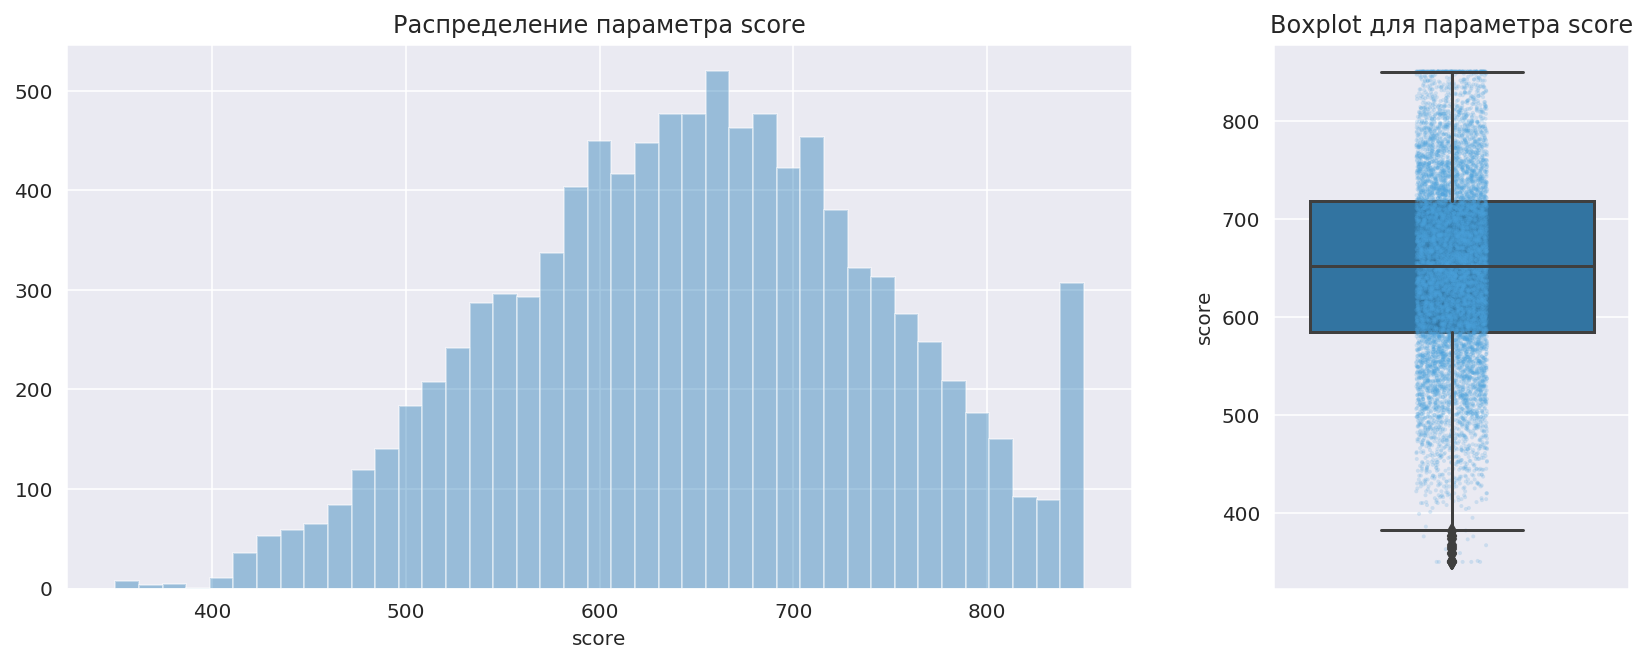

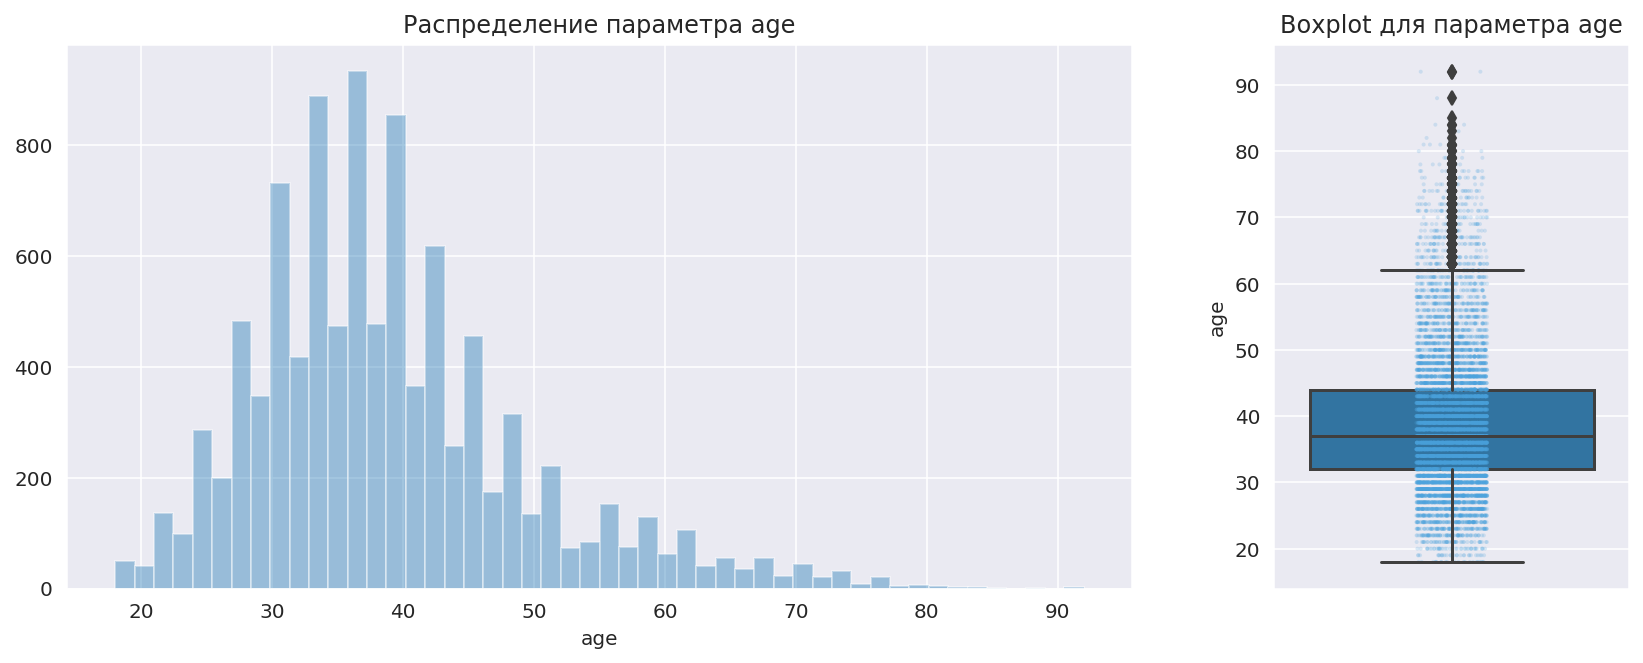

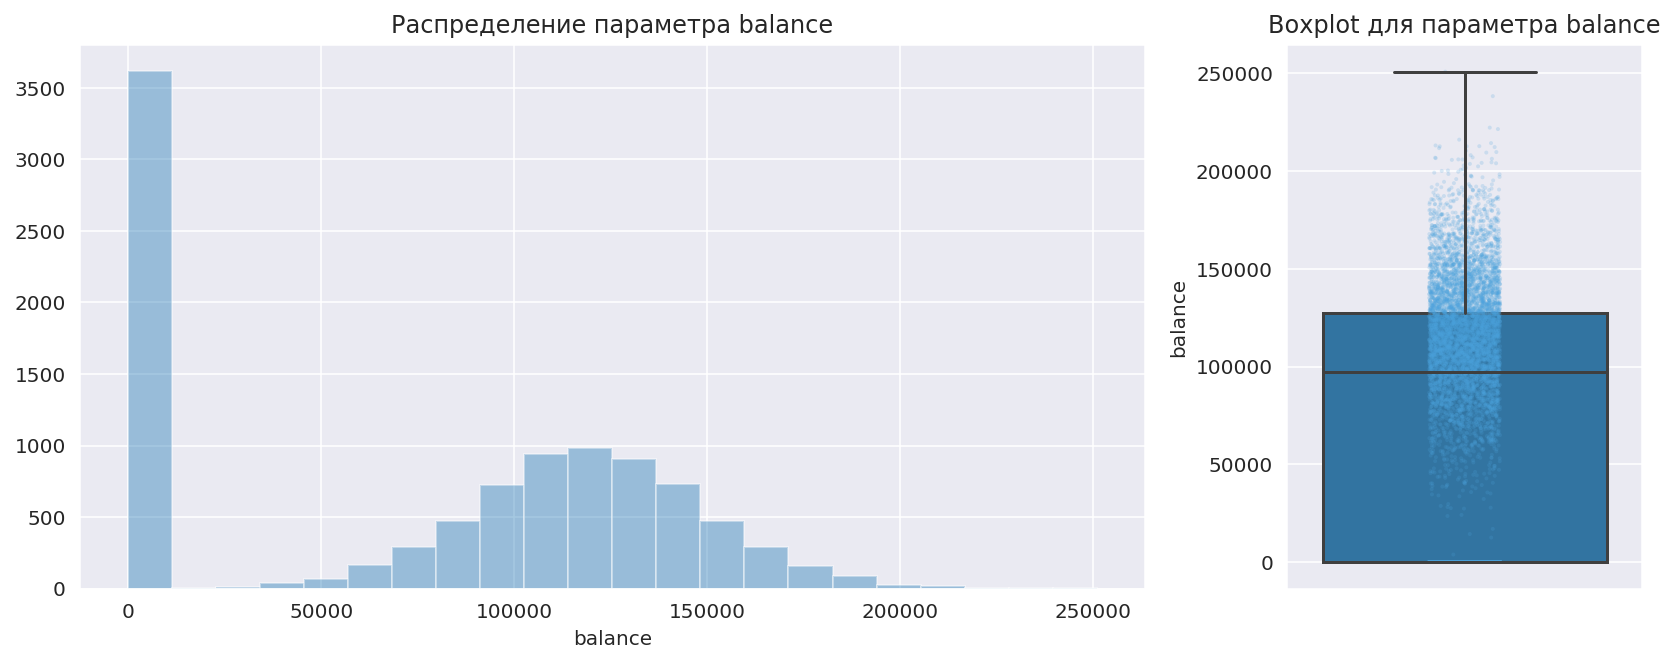

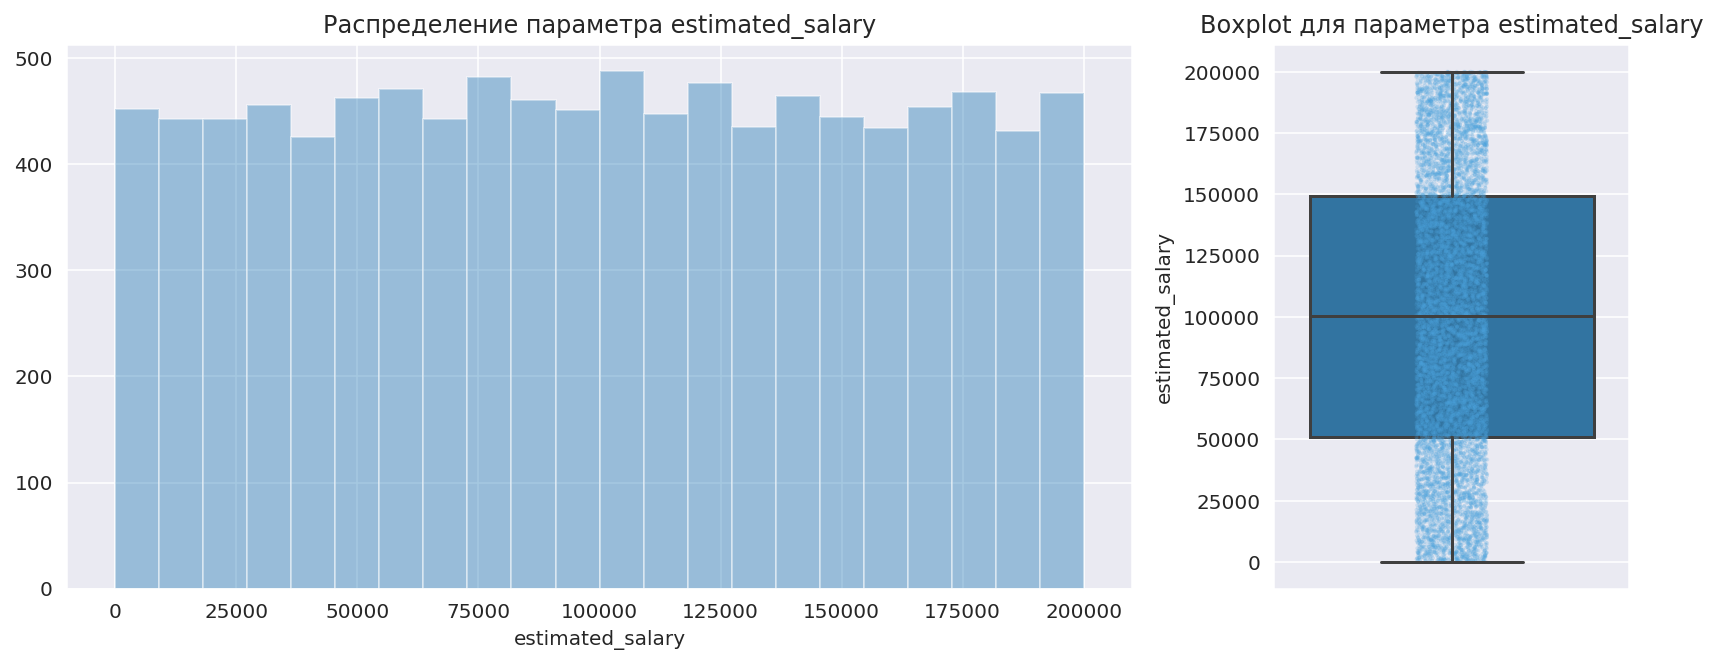

In [16]:
numeric = ['score', 'age', 'balance', 'estimated_salary']

sns.set_style("darkgrid")

for col in numeric:
    hist_boxplot(df, col)

Видим, что баллы *кредитного скоринга, возраст и баланс* имеют распределение, близкое к *нормальному*. Распределение баланса портят искусственно добавленные нами в ходе предобработки данных нулевые значения, а у баллов кредитного скоринга выброс - максимальное значение, которое соответствует наивысшему кредитному рейтингу.

*Ожидаемая заработная плата имеет равномерное распределение*.

In [17]:
df.sample()

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,balance_na
2798,15618780,579,Ростов Великий,М,28,6,150329.15,1,1,0,145558.42,0,0


Для категориальных данных построим столбчатые диаграммы:

In [47]:
categorical = ['city', 'gender', 'credit_card', 'loyalty', 'objects', 'products']

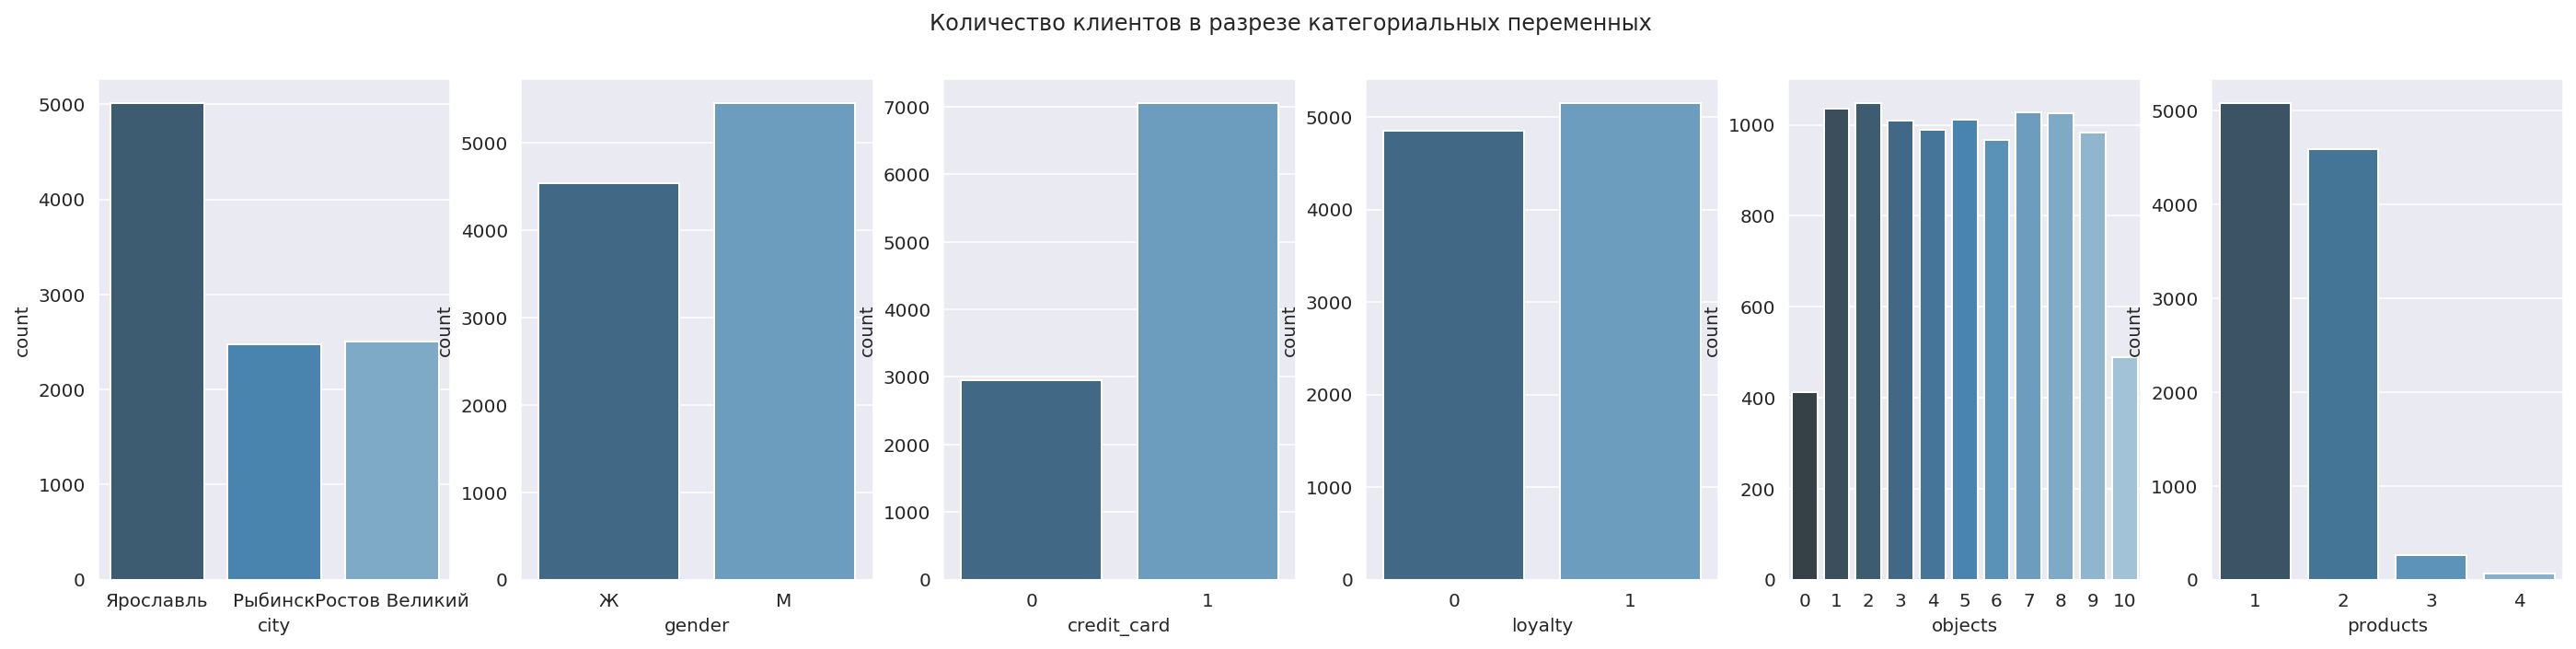

In [19]:
fig, ax = plt.subplots(1, len(categorical), figsize=(24, 5))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot, palette="Blues_d")
fig.suptitle("Количество клиентов в разрезе категориальных переменных");

Из приведенных графиков видно, что:
- Ярославль подтверждает статус областного центра - в нем примерно столько же клиентов, сколько в остальных городах;
- среди клиентов больше мужчин, но незначительно;
- кредитными картами пользуется большая часть клиентов;
- количество активных и неактивных клиентов практически совпадает;
- количество объектов в собственности распределено равномерно, разве что картину немного портят крайние значения;
- подавляющее количество клиентов пользуются не более, чем 2 продуктами.

#### Корреляционный анализ
[Вернуться в начало](#Описание-проекта)

Приведем категориальные переменные (`city` и `gender`) кколичественным, чтобы они учавствовали в корреляционном анализе:

In [20]:
df['yar'] = 0
df.loc[df['city'] == 'Ярославль', 'yar'] = 1

df['ryb'] = 0
df.loc[df['city'] == 'Рыбинск', 'ryb'] = 1

df['rost'] = 0
df.loc[df['city'] == 'Ростов Великий', 'rost'] = 1

df.loc[df['gender'] == 'М', 'gender_bool'] = 0

df.loc[df['gender'] == 'Ж', 'gender_bool'] = 1

Вычислим корреляционную матрицу и нарисуем на ее основе тепловую карту:

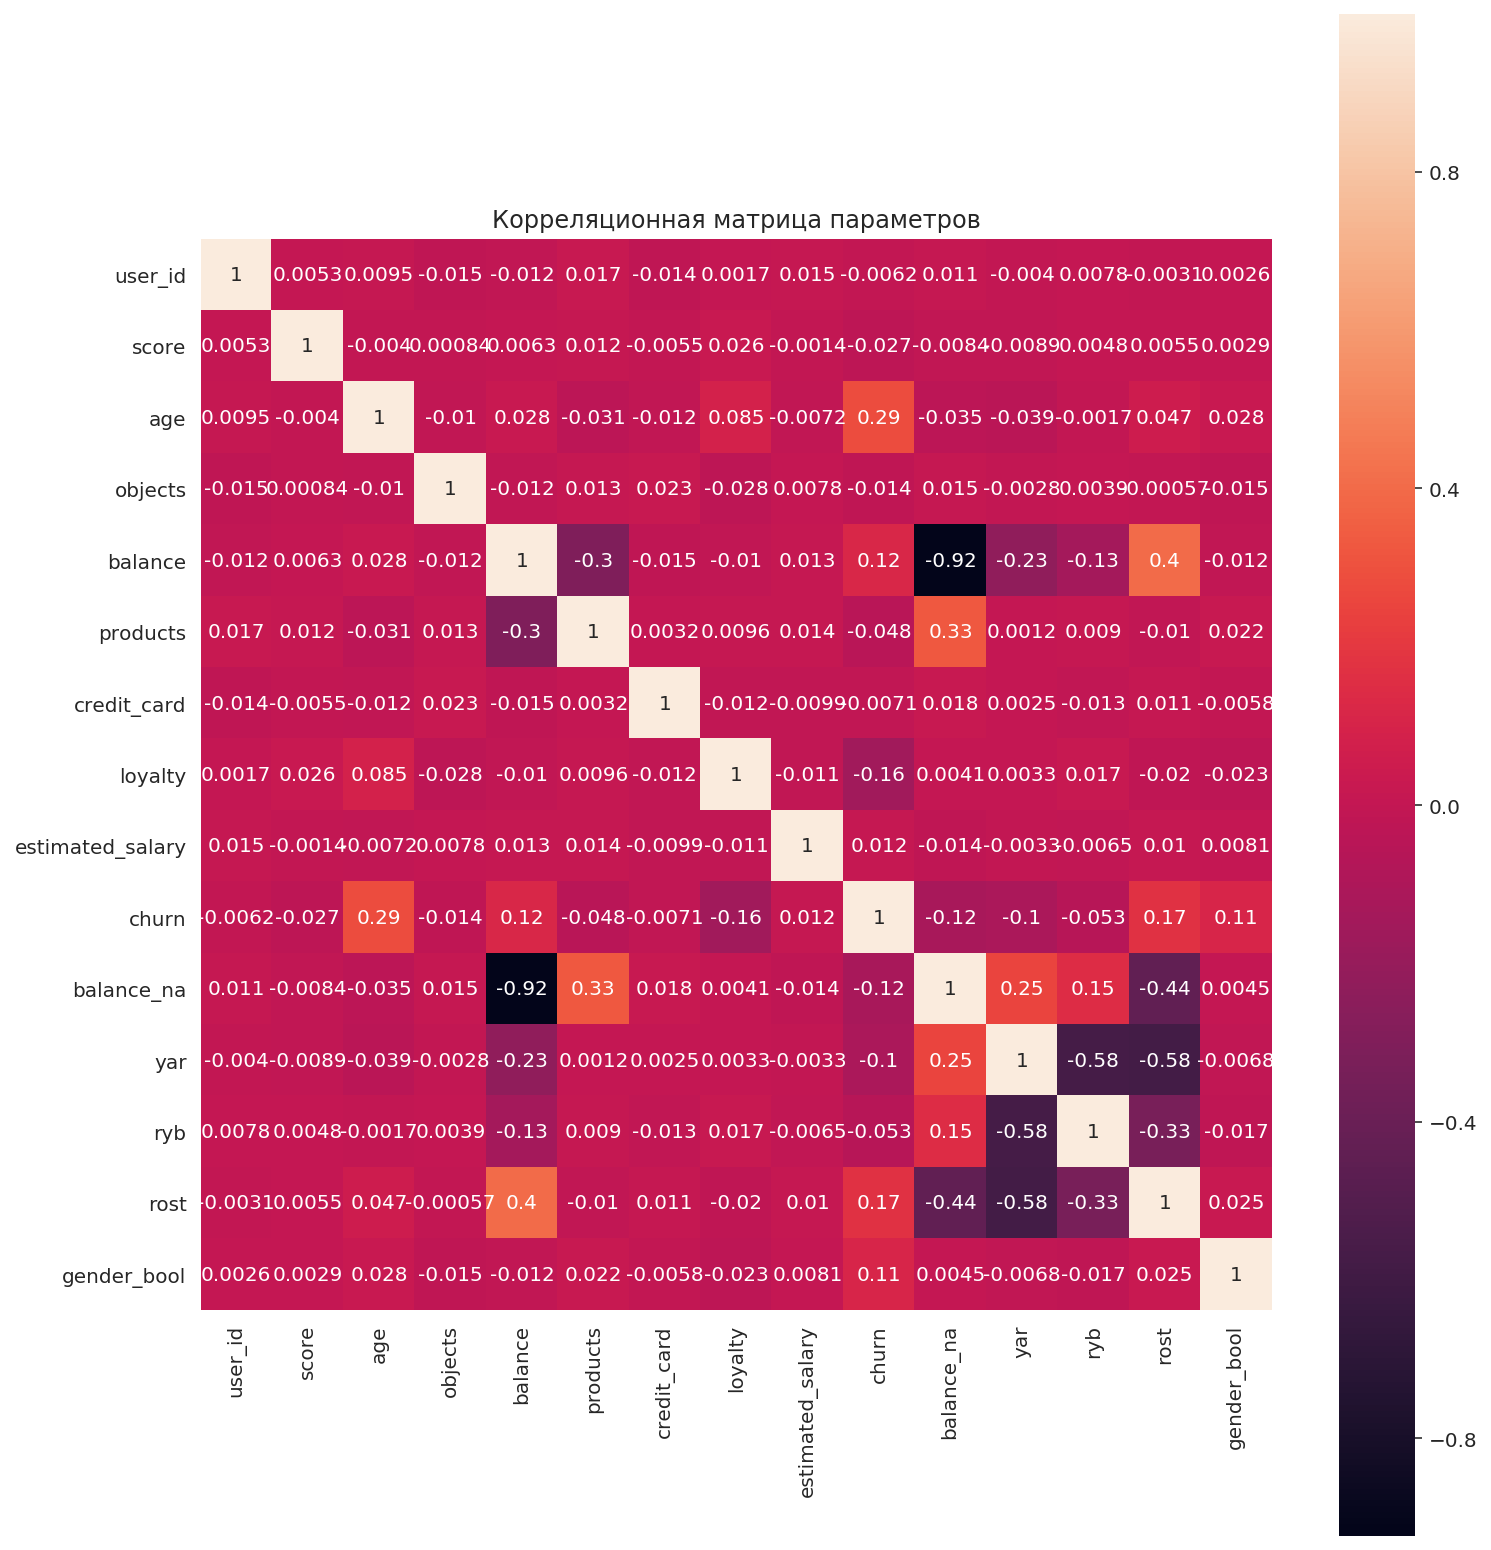

In [21]:
fig, ax = plt.subplots(figsize=(12,14))

sns.heatmap(df.corr(), annot = True, square=True)
ax.set_title("Корреляционная матрица параметров")
plt.show()

Замечаем, что отток *наиболее сильно* коррелирует с возрастом клиента (0,29), городом (особенно с Ростовом - 0,17), лояльностью (-0,16) и текущим балансом (0,12). Однако корреляция все равно очень слабая.

Нет корреляции между уровнем дохода и возрастом. Проверим гипотезу о различии доходов разных возрастных групп в соответствующем разделе. Также проверим гипотезу о различии баллов кредитного скоринга для разных возрастных групп.

Флаг отсутствия баланса сильнее всего коррелирует с количеством продуктов (0,33) и городом, исследуем эту особенность дополнительно, посчитав долю клиентов без баланса в разбивке по этим параметрам:

In [22]:
display(df.groupby('city')['balance_na'].mean().reset_index())
display(df.groupby('products')['balance_na'].mean().reset_index())

,city,balance_na
0,Ростов Великий,0.000000
1,Рыбинск,0.484053
2,Ярославль,0.482250


,products,balance_na
0,1,0.178009
1,2,0.566449
2,3,0.368421
3,4,0.233333


Замечаем, что отсутствие баланса свойственно только для Рыбинска и Ярославля. Возможно это все же ошибки при выгрузке данных. Например, если данные по городам выгружали разные сотрудники.

### Выделение портретов клиентов, которые склонны уходить из банка
#### Определение мер центральной тенденции для признаков в разрезе оттока
[Вернуться в начало](#Описание-проекта)

In [23]:
df.drop('user_id', axis=1).groupby('churn').mean()

,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,balance_na,yar,ryb,rost,gender_bool
churn,,,,,,,,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772,0.391435,0.527942,0.259199,0.212859,0.427477
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531,0.245459,0.397644,0.202749,0.399607,0.559156


In [24]:
df.drop('user_id', axis=1).groupby('churn').mean().T\
.style.background_gradient("Reds", axis=1)

churn,0,1
score,651.853,645.351
age,37.4084,44.838
objects,5.03328,4.93274
balance,72745.3,91108.5
products,1.54427,1.47521
credit_card,0.707146,0.699067
loyalty,0.554565,0.360825
estimated_salary,99738.4,101466
balance_na,0.391435,0.245459
yar,0.527942,0.397644


Сильнее всего в зависимости от факта оттока отличаются возраст, баланс, активность и город. Также в отточниках выше доля женщин, не смотря на то, что их в целом в датасете немного меншье.

Портрет типичного <span style="color:red">ушедшего клиента</span>:

44-летняя женщина из Ростова Великого с *низкой активностью* и балансом на счете выше среднего.

Портрет типичного <span style="color:green">оставшегося клиента</span>:

37-летний мужчина из Ярославля  с *высокой активностью* и балансом на счете ниже среднего.

Узнаем, как сильно различается доля оттока в разных городах:

In [25]:
df.groupby('city')['churn'].mean().reset_index()

,city,churn
0,Ростов Великий,0.324432
1,Рыбинск,0.166734
2,Ярославль,0.161548


В Ростове отток в два раза выше, чем в других городах. Это может быть связано с рекламной компанией конкурентов в этом городе, следует изучить этот вопрос.

#### Изучение распределений признаков в разрезе оттока
[Вернуться в начало](#Описание-проекта)

Перепишем функцию для вывода графиков в разрезе оттока:

In [26]:
def hist_boxplot_hue_churn(data, column):
    '''
    Функция строит гистограмму и боксплот для визуализации распределения с разбивкой по факту оттока.
    ***
    На вход: название датафрейма и столбца.
    '''
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,3),gridspec_kw={'width_ratios': [2, 1]})

    sns.distplot(data.query('churn == 0')[col], kde=False, ax=ax1)
    sns.distplot(data.query('churn == 1')[col], kde=False, ax=ax1)
    ax1.set_title("Распределение параметра {}".format(column))
    ax1.legend(labels=['Остались', 'Ушли'])
    
    sns.boxplot(y=col, x='churn', data=data, ax=ax2)
    sns.boxplot(y=col, x='churn', data=data, ax=ax2)
    sns.stripplot(y=col, x='churn', data=df, jitter=True, zorder=1, color='#4ca3dd', ax=ax2, size=2,alpha=0.2)

    ax2.set_title("Boxplot для параметра {}".format(column))
    ax2.legend(labels=['Остались', 'Ушли'])
    
    plt.show()

Применим ее для количественных параметров:

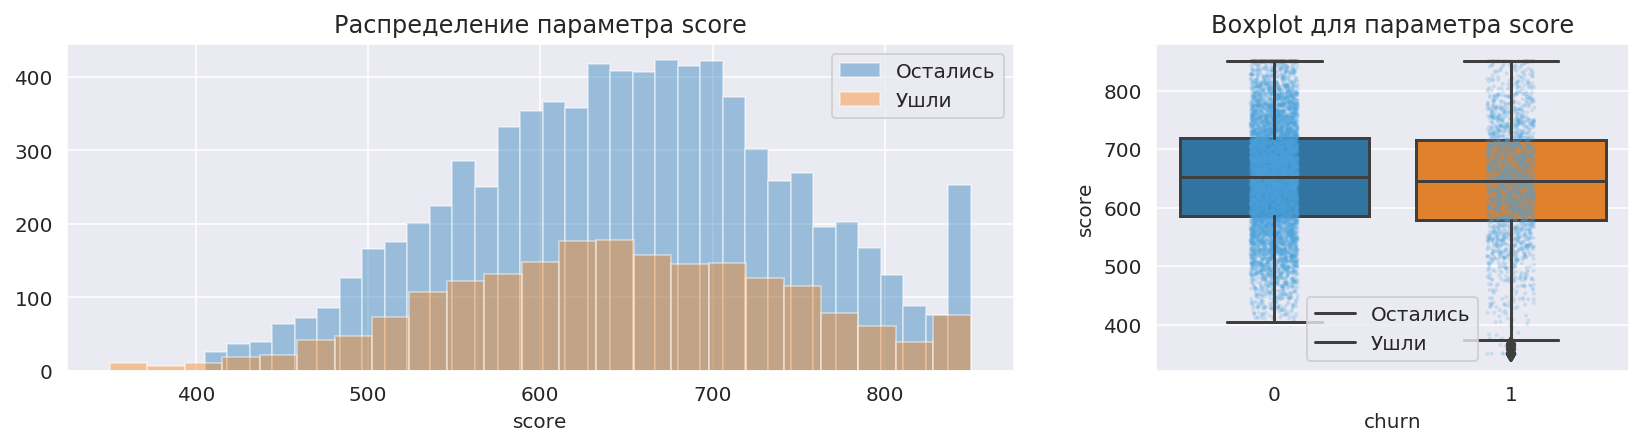

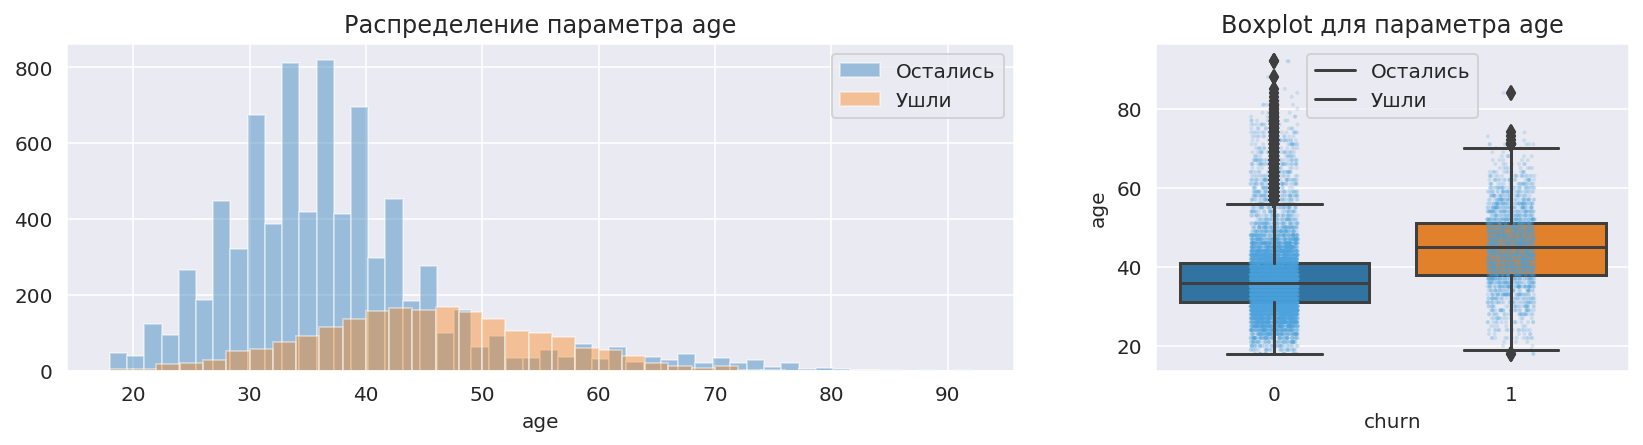

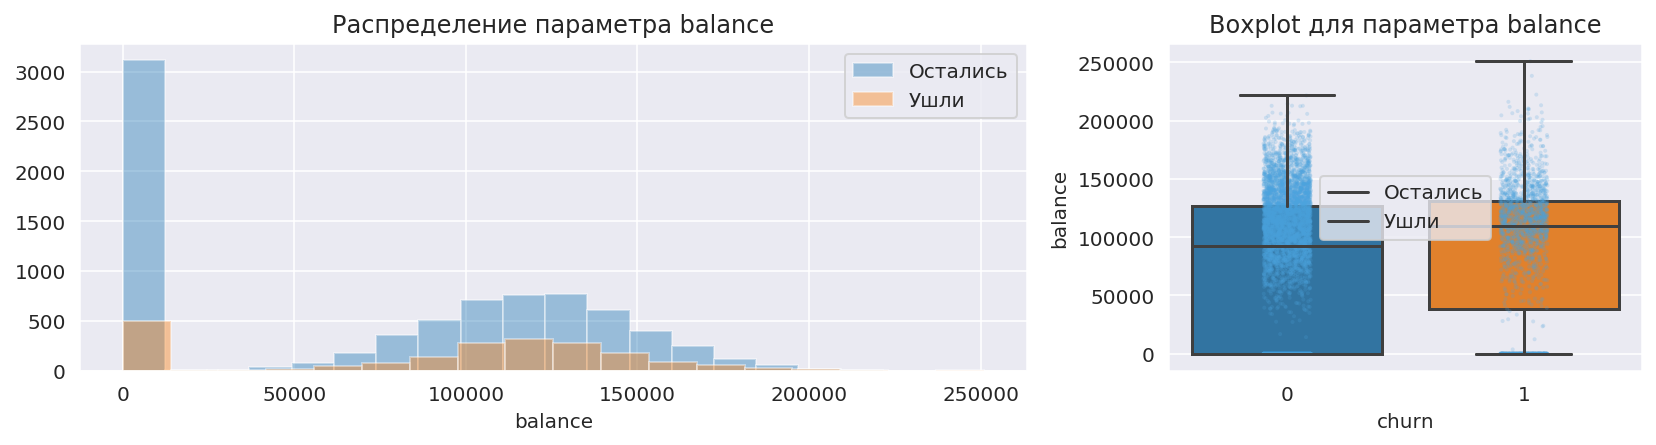

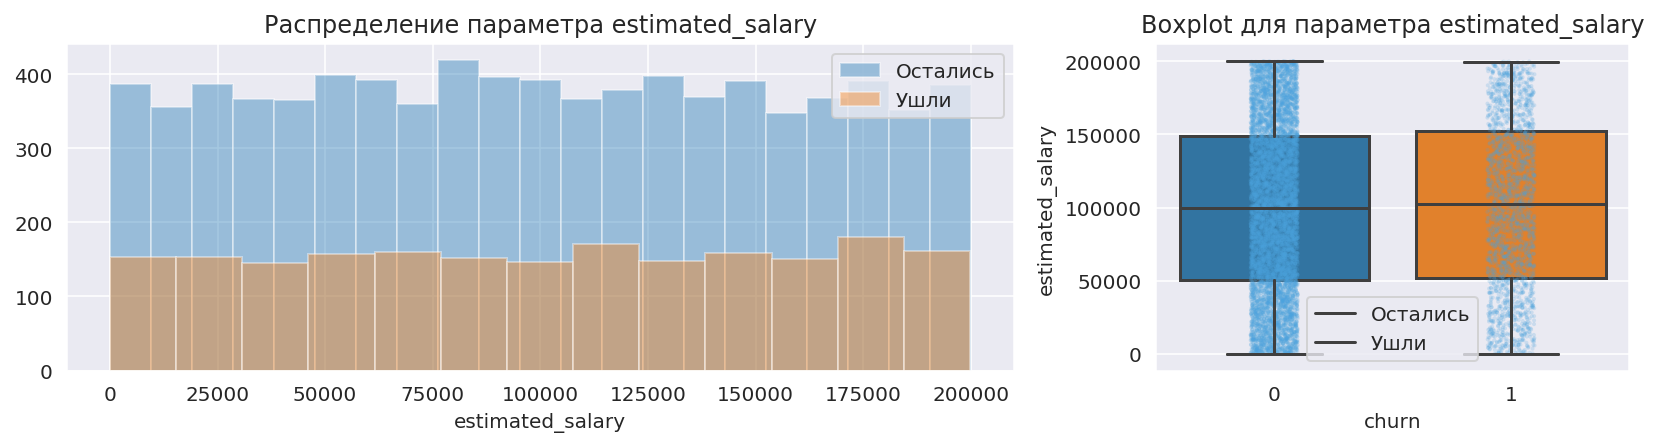

In [27]:
for col in numeric:
    hist_boxplot_hue_churn(df, col)

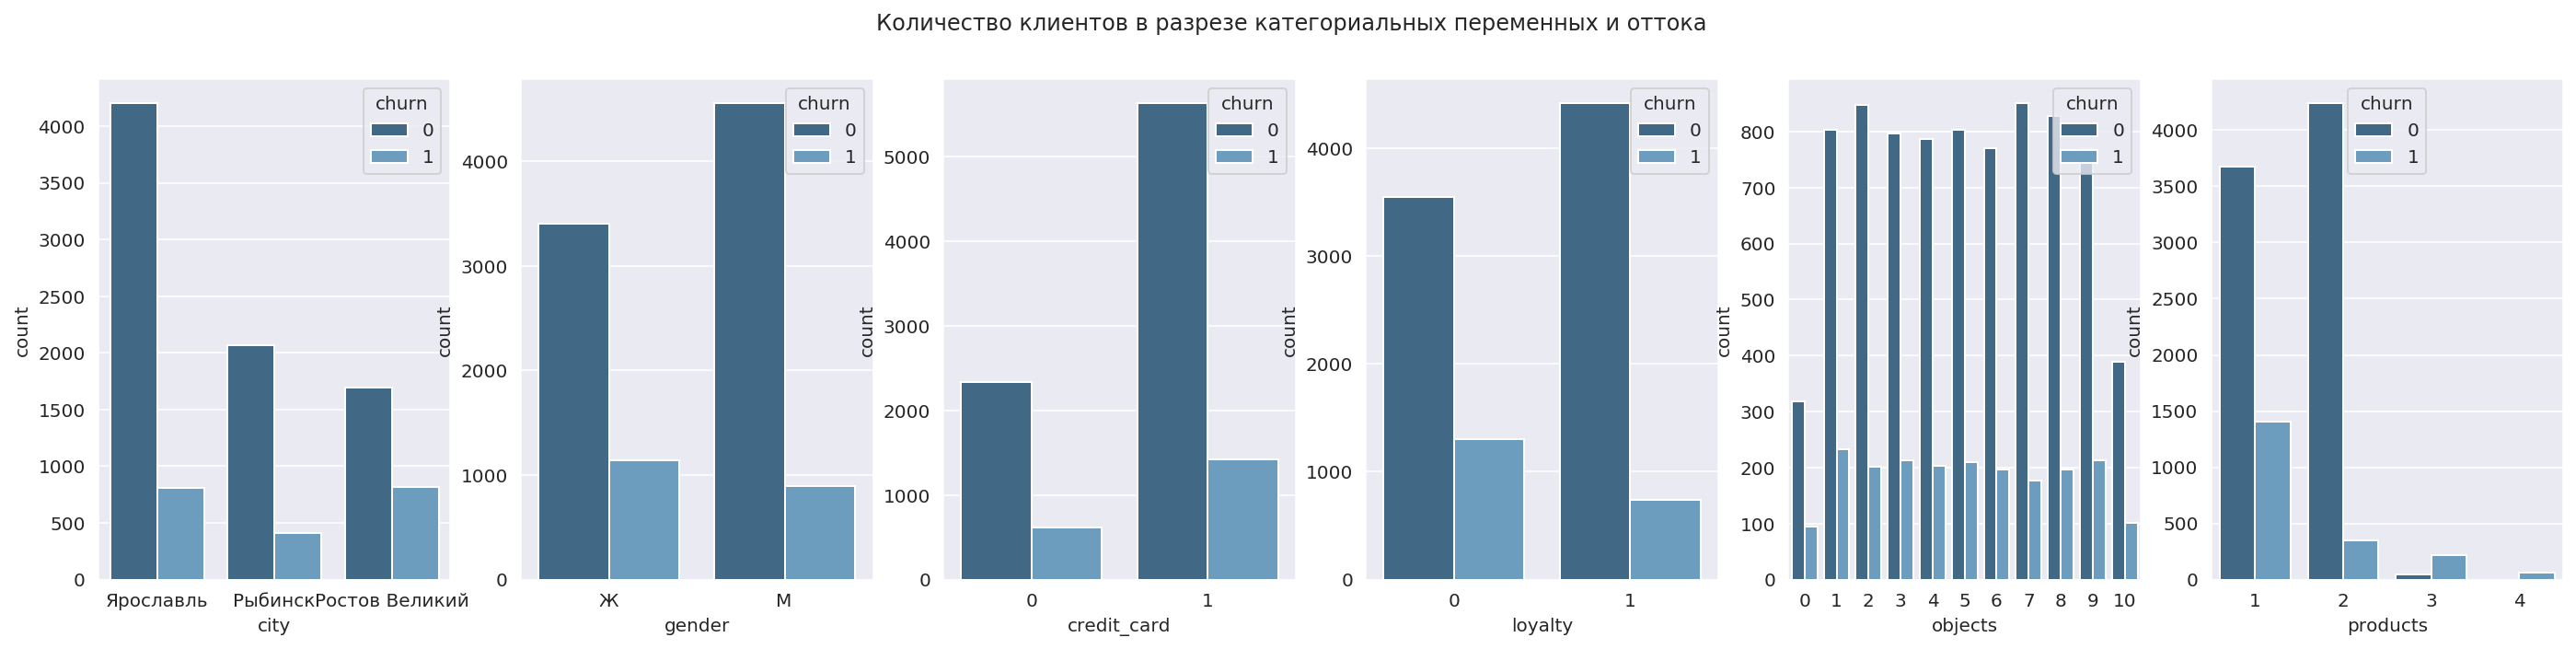

In [48]:
fig, ax = plt.subplots(1, len(categorical), figsize=(24, 5))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(data=df, x=variable, hue='churn', ax=subplot, palette="Blues_d")
fig.suptitle("Количество клиентов в разрезе категориальных переменных и оттока");

Графики подтверждают сделанные ранее выводы.

Итак, маркеры, которые свидетельствуют о возможном уходе клиента в отток:
- баланс на счете выше среднего;
- низкая активность;
- возраст выше среднего.

Также следует обращить внимание на пол и город:
- женщины более склонны к оттоку;
- в Ростове Великом отток выше.

**Ключевой метрикой** следует считать *активность* клиента. Именно на ней следует сосредоточиться при разработке мер по удержанию клиентов.

### Проверка статистических гипотез
[Вернуться в начало](#Описание-проекта)

Для данной задачи будет достаточным уровень статистической значимости, равный 0,05. 

In [29]:
alpha = 0.05

Проверим гипотезу **различия дохода между теми клиентами, которые ушли и теми, которые остались**.

Изучим распределения выборок:

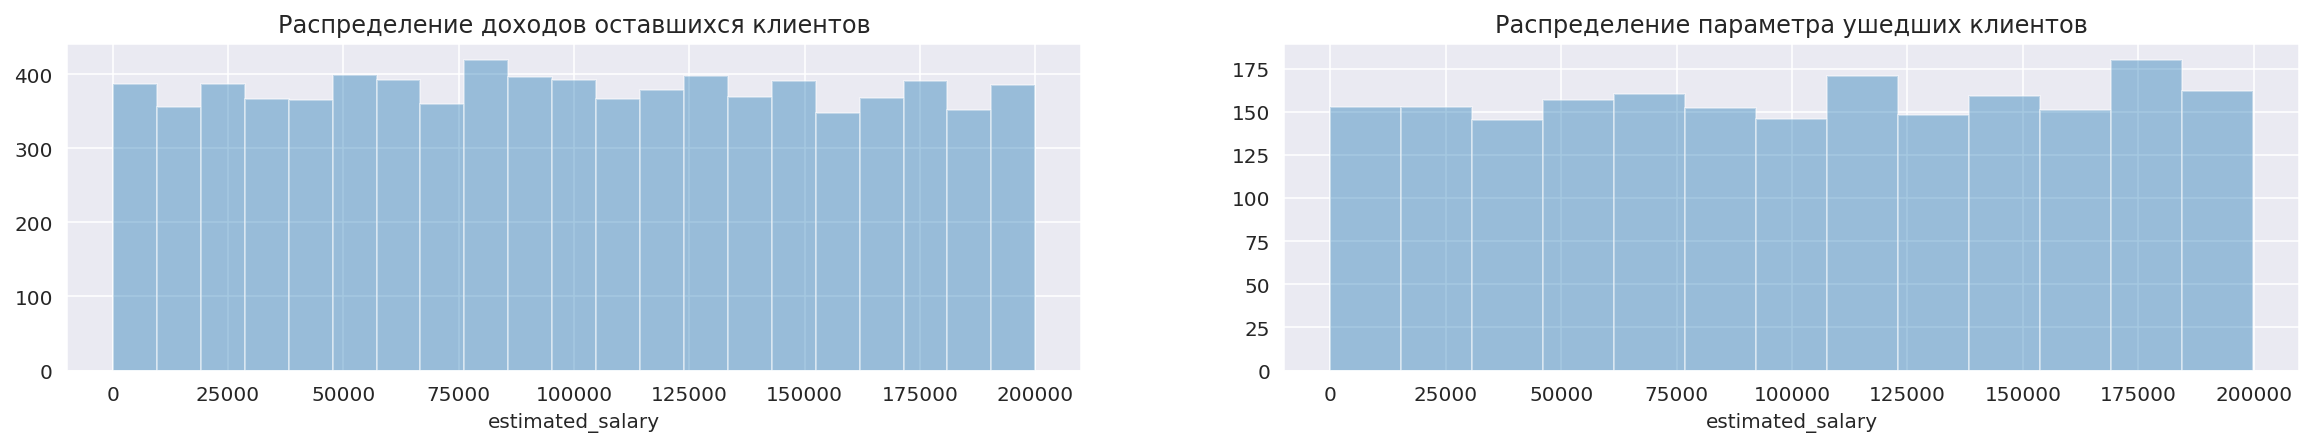

In [30]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,3))

sns.distplot(df.query('churn == 0')['estimated_salary'], kde=False, ax=ax1)
ax1.set_title("Распределение доходов оставшихся клиентов")

sns.distplot(df.query('churn == 1')['estimated_salary'], kde=False, ax=ax2)
ax2.set_title("Распределение параметра ушедших клиентов")

plt.show()

Изучим размер выборок:

In [31]:
df.groupby('churn')['estimated_salary'].count().to_frame()

,estimated_salary
churn,
0,7963
1,2037


В данном случае рассматривается гипотеза о равенстве между собой средних двух генеральных совокупностей. Значения в выборках распределены равномерно, выбросов нет. Поэтому используем параметрический метод `ttest_ind`. Гипотеза H₀: средние двух генеральных совокупностей равны (тк H₀ всегда формулируется так, чтобы использовать знак равенства.). Тогда H₁: средние двух генеральных совокупностей **не** равны.

Зададим функцию для расчета ттеста:

In [32]:
def ttest_ind_(df1, df2, a):
    results = st.ttest_ind(df1, df2)

    print('p-значение:', results.pvalue)
    
    print("Относительные различия в доходе между группами: {0:.3f}".format(df1.mean() / df2.mean()-1))
    
    if (results.pvalue < a):
        display(HTML("<font color='red'>Отвергаем нулевую гипотезу</font>"))
    else:
        display(HTML("<font color='green'>Не получилось отвергнуть нулевую гипотезу</font>"))

In [33]:
ttest_ind_(df.query('churn == 0')['estimated_salary'], df.query('churn == 1')['estimated_salary'], alpha)

p-значение: 0.22644042802223346
Относительные различия в доходе между группами: -0.017


P-value значительно больше уровня критической значимости. Значит, **нет причин отвергать нулевую гипотезу** и считать, что в доходах есть различия в зависимости от оттока.

Проверим гипотезу о **различии доходов разных возрастных групп**.

Группы разобьем по медиане:

In [34]:
df['age_qcut'] = pd.qcut(df['age'], 2, labels=["Младшая группа", "Старшая группа"])

In [35]:
df['age_qcut'].value_counts()

Младшая группа    5087
Старшая группа    4913
Name: age_qcut, dtype: int64

Изучим распределения выборок:

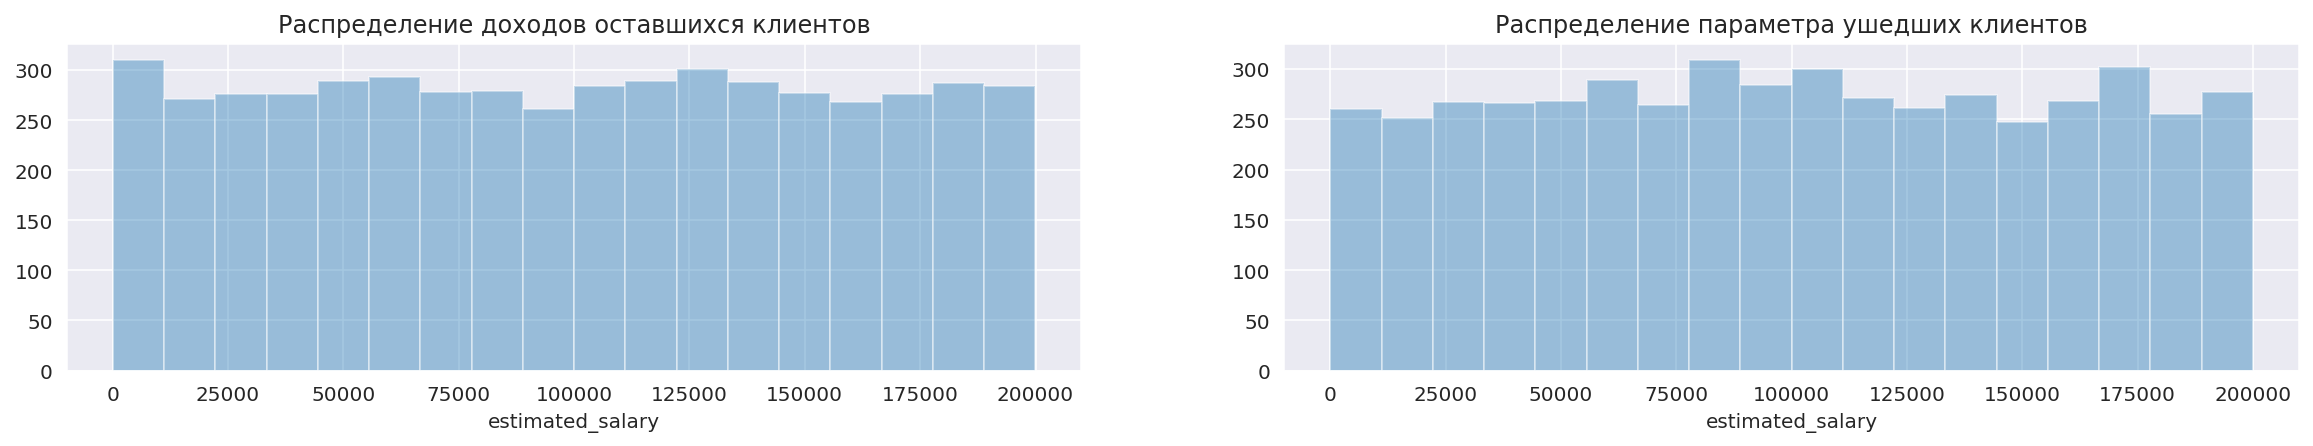

In [36]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,3))

sns.distplot(df.query('age_qcut == "Младшая группа"')['estimated_salary'], kde=False, ax=ax1)
ax1.set_title("Распределение доходов оставшихся клиентов")

sns.distplot(df.query('age_qcut == "Старшая группа"')['estimated_salary'], kde=False, ax=ax2)
ax2.set_title("Распределение параметра ушедших клиентов")

plt.show()

Изучим размер выборок:

In [37]:
df.groupby('age_qcut')['estimated_salary'].count().to_frame()

,estimated_salary
age_qcut,
Младшая группа,5087
Старшая группа,4913


В данном случае рассматривается гипотеза о равенстве между собой средних двух генеральных совокупностей. Значения в выборках распределены равномерно, выбросов нет. Поэтому используем параметрический метод `ttest_ind`. Гипотеза H₀: средние двух генеральных совокупностей равны (тк H₀ всегда формулируется так, чтобы использовать знак равенства.). Тогда H₁: средние двух генеральных совокупностей **не** равны.

In [38]:
ttest_ind_(df.query('age_qcut == "Младшая группа"')['estimated_salary'], \
           df.query('age_qcut == "Старшая группа"')['estimated_salary'], alpha)

p-значение: 0.5819914646108809
Относительные различия в доходе между группами: -0.006


P-value значительно больше уровня критической значимости. Значит, **нет причин отвергать нулевую гипотезу** и считать, что в доходах есть различия в зависимости возраста.

Проверим гипотезу о **различии баллов кредитного скоринга для разных возрастных групп**.

Изучим распределения выборок:

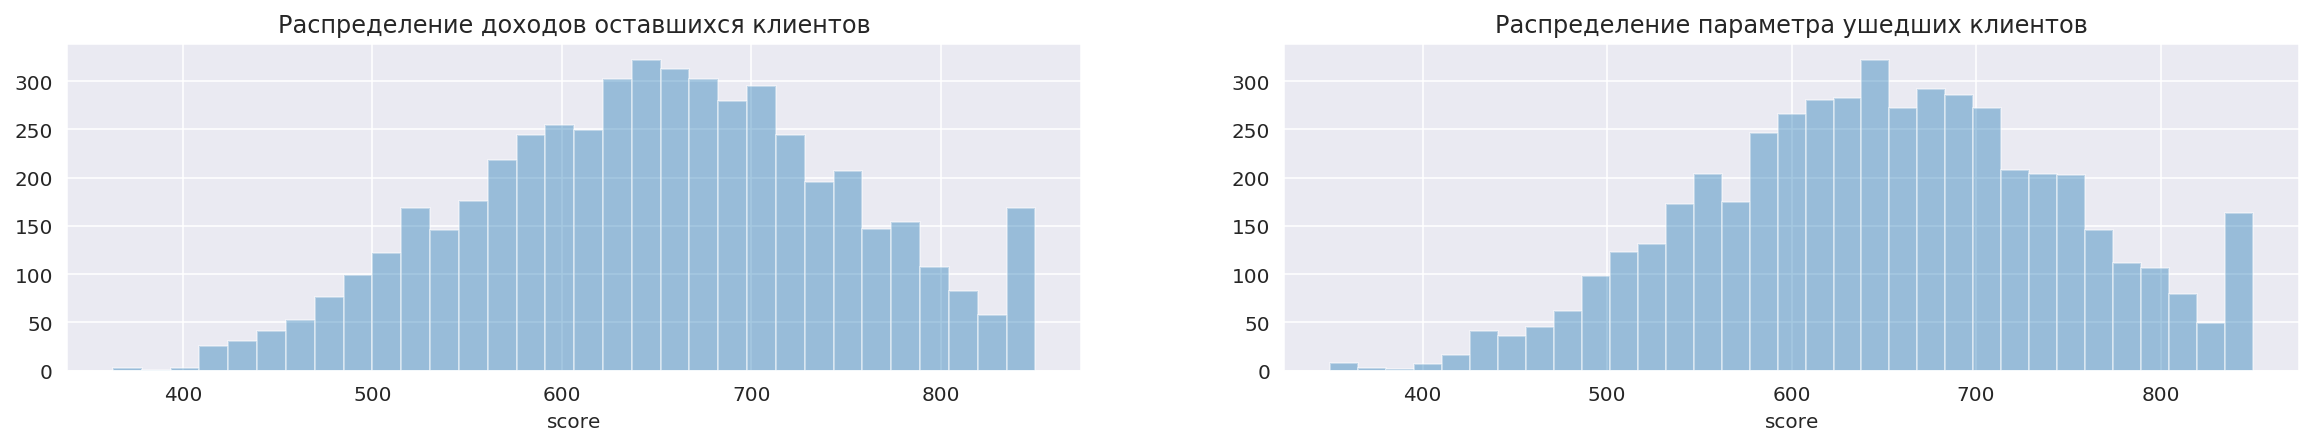

In [39]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,3))

sns.distplot(df.query('age_qcut == "Младшая группа"')['score'], kde=False, ax=ax1)
ax1.set_title("Распределение доходов оставшихся клиентов")

sns.distplot(df.query('age_qcut == "Старшая группа"')['score'], kde=False, ax=ax2)
ax2.set_title("Распределение параметра ушедших клиентов")

plt.show()

Изучим размер выборок:

In [40]:
df.groupby('age_qcut')['score'].count().to_frame()

,score
age_qcut,
Младшая группа,5087
Старшая группа,4913


В данном случае рассматривается гипотеза о равенстве между собой средних двух генеральных совокупностей, размеры которых примерно равны. Значения в выборках распределены нормально, однако заметны выбросы. Поэтому используем *непараметрический тест Уилкоксона-Манна-Уитни*. Гипотеза H₀: средние двух генеральных совокупностей равны (тк H₀ всегда формулируется так, чтобы использовать знак равенства.). Тогда H₁: средние двух генеральных совокупностей **не** равны.

In [43]:
results = st.mannwhitneyu(df.query('age_qcut == "Младшая группа"')['score'], df.query('age_qcut == "Старшая группа"')['score'])

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    display(HTML("<font color='red'>Отвергаем нулевую гипотезу</font>"))
else:
    display(HTML("<font color='green'>Не получилось отвергнуть нулевую гипотезу</font>"))

p-значение:  0.25930248598135386


P-value значительно больше уровня критической значимости. Значит, **нет причин отвергать нулевую гипотезу** и считать, что в баллах кредитного скоринга есть различия в зависимости от возраста.

### Выводы и рекоммендации
[Вернуться в начало](#Описание-проекта)

**Выводы:**

- у 6,4% клиентов отсутствует информация о зарплате (ЗП меньше МРОТ);
- подавляющее количество клиентов банка пользуются не более, чем 2 продуктами;
- кредитными картами пользуется большая часть клиентов;
- отток наиболее сильно коррелирует с возрастом клиента (0,29), текущим балансом (0,12), лояльностью (-0,16) и с городом (с Ростовом - 0,17);
- отсутствие баланса свойственно только для Рыбинска и Ярославля;
- портрет типичного <span style="color:red">ушедшего клиента</span>: 44-летняя женщина из Ростова Великого с *низкой активностью* и балансом на счете выше среднего;
- портрет типичного <span style="color:green">оставшегося клиента</span>: 37-летний мужчина из Ярославля  с *высокой активностью* и балансом на счете ниже среднего;
- нет причин отвергать ни одну из следующих гипотез:
    - равенство доходов между теми клиентами, которые ушли и теми, которые остались;
    - равенство доходов разных возрастных групп;
    - равенствобаллов кредитного скоринга для разных возрастных групп.

**Рекоммендации:**

- принять ключевой метрикой активность клиента и сосредоточиться на ней при разработке мер по удержанию клиентов;
- провести дополнительное исследование о причинах более высокой доли оттока в Ростове Великом;
- ввести прогрессивную бонусную шкалу для активных клиентов для в рамках мер по удержанию клиентов.